### Cell 1:
Define file and folder paths; change the `folder` path to match the location of the `data` folder on your computer. Don't change anything else in here!

In [1]:
# set this path to match the location of your data folder
# this is the ONLY thing you should change in this cell
folder = r'C:\Users\dwmcclellan\OneDrive - Fort Lewis College\0-Fall 2021\GEOG-315\Final_Project\geog-315-final-project\data'

# input digital elevation model
dem = 'johnday_dem.tif'

# output files that your code will produce
sample_sites = 'SampleSites.shp'
watersheds_poly = 'SampleSiteWatersheds.shp'
output_plot = folder  + r'\rainbow_trout.pdf'

### Cell 2:
Import the modules we'll need and specify environment variables. You shouldn't need to change anything in here.

In [2]:
# Cell 2

# bring in the modules we need
import arcpy
import matplotlib.pyplot as plt
%matplotlib inline

# specify environment variables
arcpy.env.overwriteOutput = True
arcpy.env.workspace = folder

# Check out spatial analyst extension
arcpy.CheckOutExtension('spatial')

'CheckedOut'

### Cell 3:
Produce a list of all the shapefiles in the `data` folder.

In [14]:
shplist =  arcpy.ListFeatureClasses('*.shp')

### Cell 4:
Merge all of the shapefiles in the `data` folder together.

In [17]:
import os
arcpy.Merge_management(shplist, os.path.join(sample_sites))

<Result 'C:\\Users\\dwmcclellan\\OneDrive - Fort Lewis College\\0-Fall 2021\\GEOG-315\\Final_Project\\geog-315-final-project\\data\\SampleSites.shp'>

### Cell 5:
Produce and save a bar plot that shows the number of rainbow trout per reach.

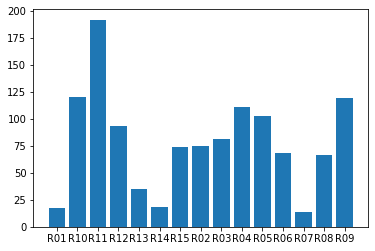

In [22]:
# Read the data from the shapefile.
x, y = zip(*arcpy.da.SearchCursor("SampleSites.shp", ['REACH', 'RT'])) 

plt.bar(x, y)

plt.savefig(output_plot, transparent=True)

### Cell 6:
Derive the upstream watershed for each of the `sample_sites`.

In [28]:
from arcpy import env
from arcpy.sa import *

snap_distance = 20

# 1 fill small sinks and depressions in the DEM specified by the variable 'dem'
fill = arcpy.sa.Fill(dem)

#2 run flow direction
# Create a flow direction raster from the DEM.
flow_dir = arcpy.sa.FlowDirection(fill)

#3 run flow accumulation
# Use the flow direction raster to create an accumulation raster.
accumulation = arcpy.sa.FlowAccumulation(flow_dir)

#4 run snap pour point
snap = arcpy.sa.SnapPourPoint(flow_dir, accumulation, snap_distance)

#5 run watershed tool using flow direction and result of snap pour point
watershed = Watershed(flow_dir, snap)

### Cell 7:
Convert the raster output of the `Watershed` tool to a polygon shapefile.

In [30]:
arcpy.conversion.RasterToPolygon(watershed, watersheds_poly)
# watershed.save(watersheds_poly)

<Result 'C:\\Users\\dwmcclellan\\OneDrive - Fort Lewis College\\0-Fall 2021\\GEOG-315\\Final_Project\\geog-315-final-project\\data\\SampleSiteWatersheds.shp'>